In [1]:
%load_ext autoreload
import os
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from postamats.utils import prepare_data, helpers
from postamats.utils.connections import DB
from postamats.optimization import clustopt
from postamats.global_constants import APARTMENT_HOUSES_NAME, ALL_METRO_NAME, ALL_OBJECTS_NAME, MAX_ACTIVE_RADIUS, METERS_TO_SEC_COEF
from postamats.utils.connections import PATH_TO_ROOT

pd.set_option('display.max_columns', None)

In [2]:
CONFIG_PATH = os.path.join(PATH_TO_ROOT, 'db_config.json')
with open(CONFIG_PATH, mode='r') as db_file:
    db_config = json.load(db_file)
database = DB(db_config)

In [3]:
apart_query = "select object_id, lat, lon, object_type, population from public.apartment_houses_all_data"
metro_query = "select object_id_metro, lat, lon, object_type from public.all_metro_objects_data where object_type='кластер входов в метро'"
points_query = 'select object_id, lat, lon, object_type from public.all_objects_data'

all_apart = database.get_by_sql(apart_query)
all_metro = database.get_by_sql(metro_query)

Connection to PostgreSQL DB successful


/Users/affernus/PROJECTS/hacks/postomat_optimisation/src/postamats/utils/connections.py:114: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Connection to PostgreSQL DB successful
Connection to PostgreSQL DB successful


/Users/affernus/PROJECTS/hacks/postomat_optimisation/src/postamats/utils/connections.py:114: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)
/Users/affernus/PROJECTS/hacks/postomat_optimisation/src/postamats/utils/connections.py:114: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


In [4]:
population = all_apart['population'].copy()
population = population[(population>0) & (population<2000)]

<AxesSubplot: >

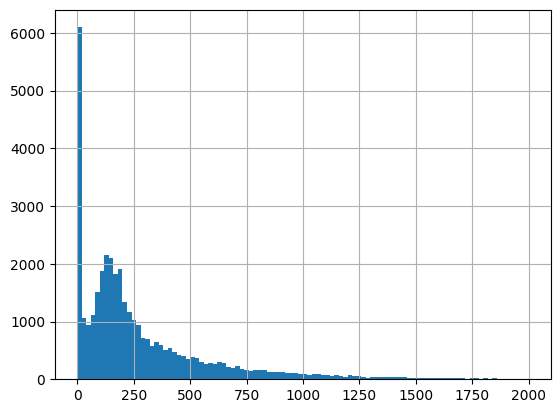

In [5]:
population.hist(bins=100)

In [6]:
big_houses_thresold=population.quantile(.75)

<AxesSubplot: >

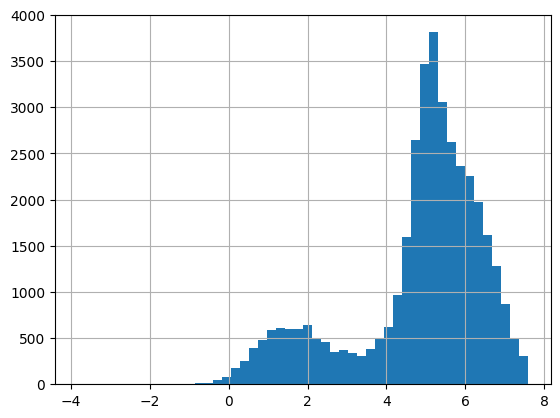

In [7]:
np.log(population).hist(bins=50)

378.237518148698


In [69]:
test_pop = list(range(0,1500,1))
print(big_houses_thresold)

quantiles = []
for qnt in [0,0.1,.25,.5,.75, .9]:
    quantiles.append(all_apart['population'].quantile(qnt).round(0))
    print(f"{qnt}: {all_apart['population'].quantile(qnt).round(0)}")

378.237518148698
0: 0.0
0.1: 6.0
0.25: 85.0
0.5: 184.0
0.75: 390.0
0.9: 740.0


In [ ]:
# angle = alpha * helpers.weigh_population(shift, alpha, shift) * (1 - helpers.weigh_population(shift, alpha, shift))

# my_line = [angle * (x - 400) for x in test_pop]

In [114]:
def correct_alpha(alpha, importance):
    my_coef = 20 * abs(.5-importance) + int(importance == .5)
    if importance < .5:
        return alpha / my_coef
    return alpha * my_coef

0.05732417589886873


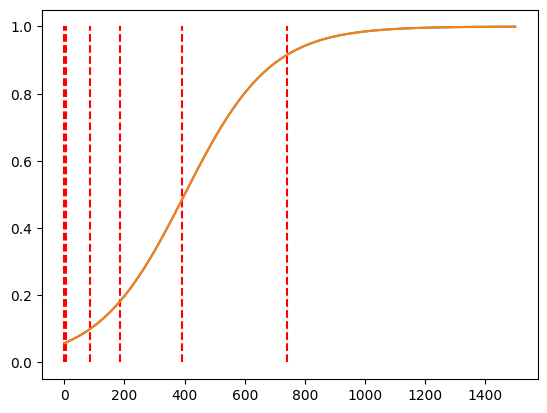

In [115]:
alpha = .007
shift = 400
importance = .5

weights = [helpers.weigh_population(w, alpha, shift) for w in test_pop]
corrected_weights = [helpers.weigh_population(w, correct_alpha(alpha, importance), shift) for w in test_pop]
print(weights[0])
plt.plot(weights)
plt.vlines(quantiles,0,1,colors='r',linestyles='--')
plt.plot(corrected_weights)
plt.plot()
plt.show()